<a href="https://www.kaggle.com/code/sayedshaun/genshin-impact-reviews-analysis?scriptVersionId=176806141" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings("ignore")


df = pd.read_csv("/kaggle/input/genshin-impact-google-play-reviews/genshin_review.csv")
df.head()

,review,rating
0,Absolute Masterpiece i hate the people who gav...,5
1,amazing but the fandom isn't amazing,5
2,Very nice,5
3,Give me gambling money (primo gems),4
4,"This is one my first Open World RPG games, and...",4


## Rating Distribution by Categories

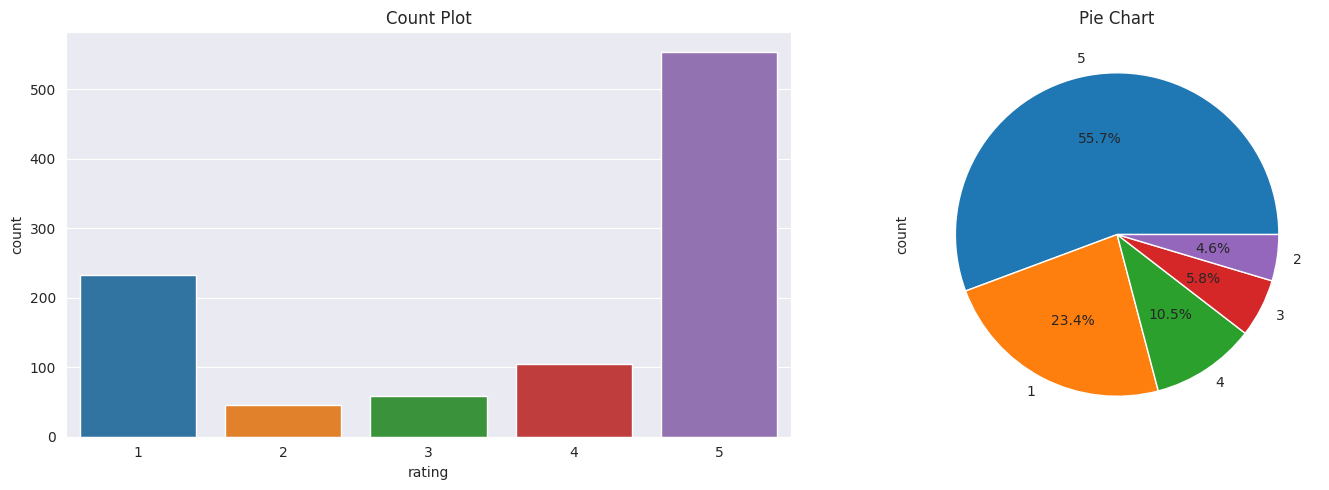

In [2]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot(data=df, x="rating", ax=axs[0])
axs[0].set_title('Count Plot')
df["rating"].value_counts().plot(kind="pie",autopct='%1.1f%%', ax=axs[1])
axs[1].set_title('Pie Chart')
plt.tight_layout()
plt.show()

## Distribution of All (1-5) Star Review by Review Length

In [3]:
def plot(df, select_rating=None):
    if select_rating==None:
        sentence_len = df["review"].apply(lambda x: len(x.split(" ")))
    else:
        sentence_len = df[df["rating"]==select_rating]["review"].apply(lambda x: len(x.split(" ")))
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    sns.histplot(sentence_len, ax=axs[0], color="darkblue")
    axs[0].set_title('Histogram')
    sns.kdeplot(sentence_len, ax=axs[1], color="green")
    axs[1].set_title(f"Skewness: {sentence_len.skew():.3f}")
    sns.boxplot(data=df, x=sentence_len, ax=axs[2], color="sienna")
    axs[2].set_title(f"Boxplot")
    plt.tight_layout()
    plt.show()
    return sentence_len

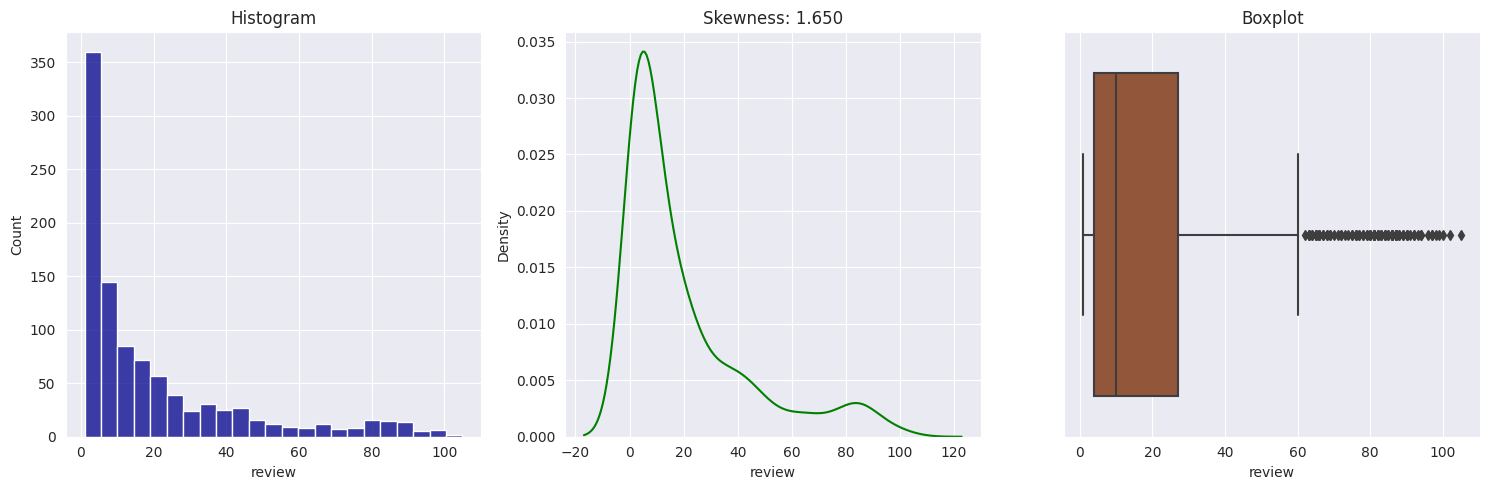

In [4]:
all_review = plot(df)

## Distribution of 1 Star Review by Review Length

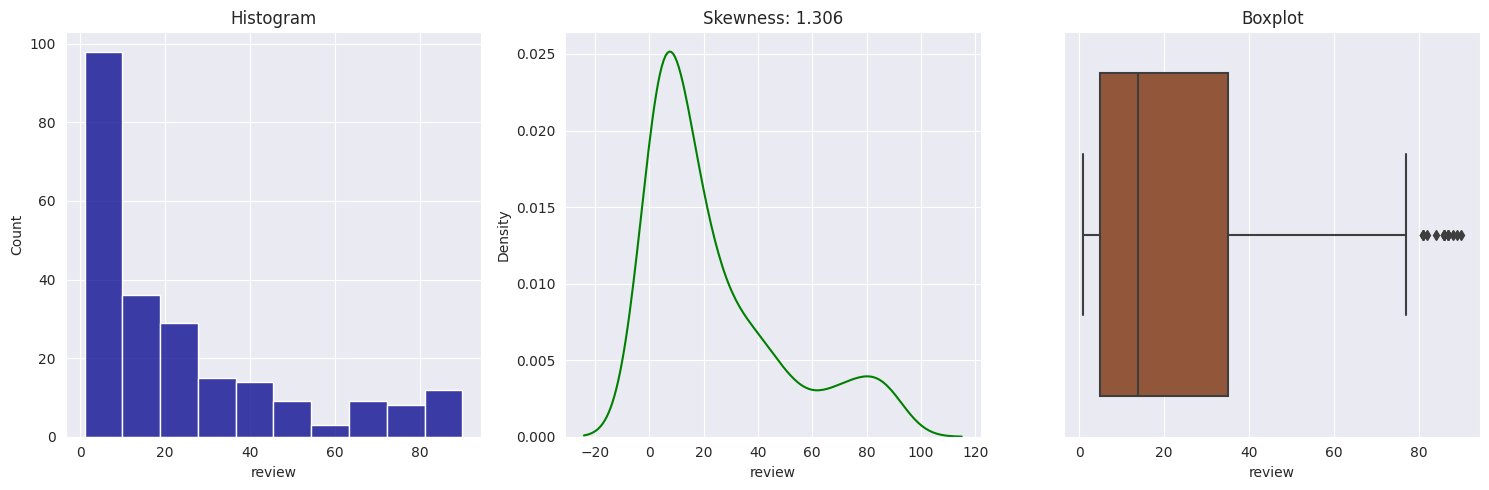

In [5]:
review_1 = plot(df, select_rating=1)

## Distribution of 2 Star Review by Review Length

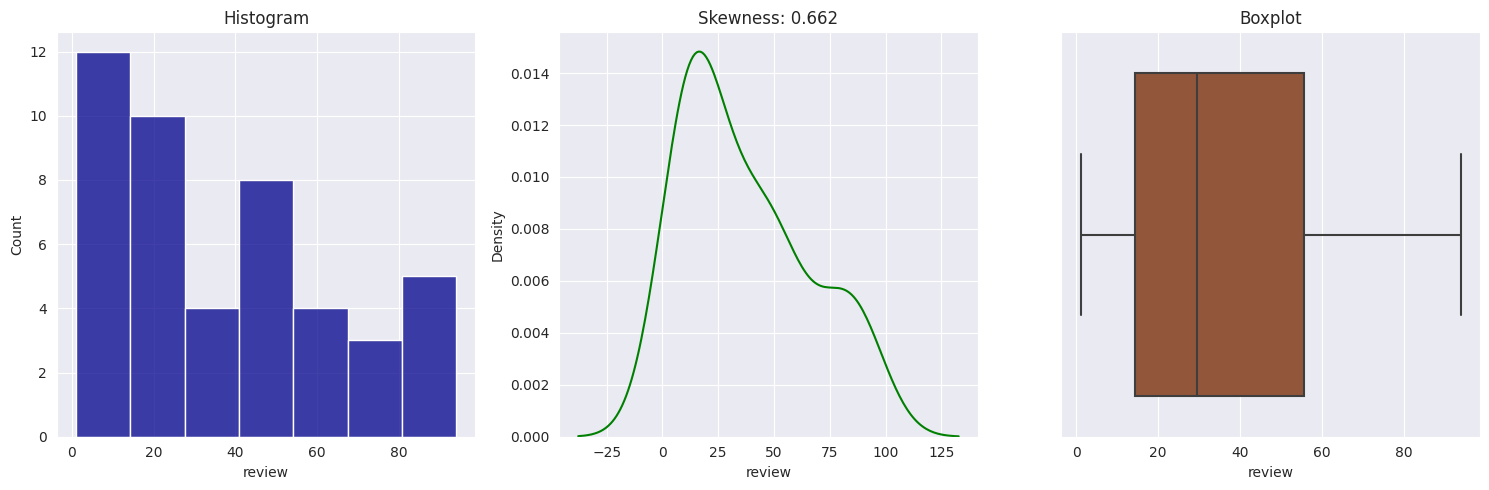

In [6]:
review_2 = plot(df, select_rating=2)

## Distribution of 3 Star Review by Review Length

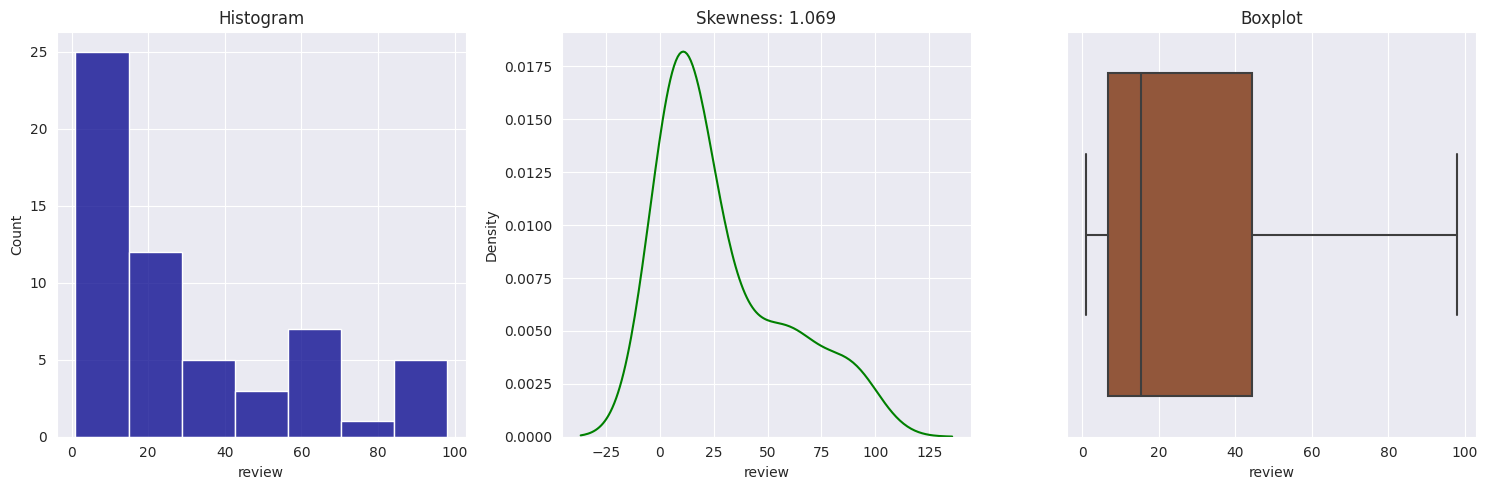

In [7]:
review_3 = plot(df, select_rating=3)

## Distribution of 4 Star Review by Review Length

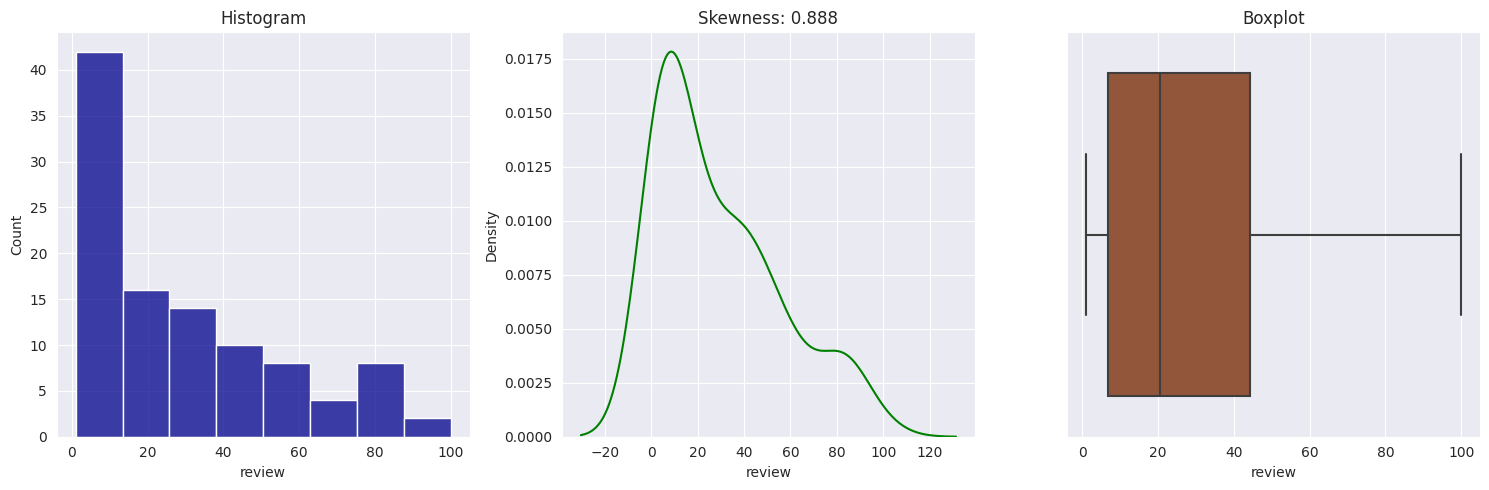

In [8]:
review_4 = plot(df, select_rating=4)

## Distribution of 5 Star Review by Review Length

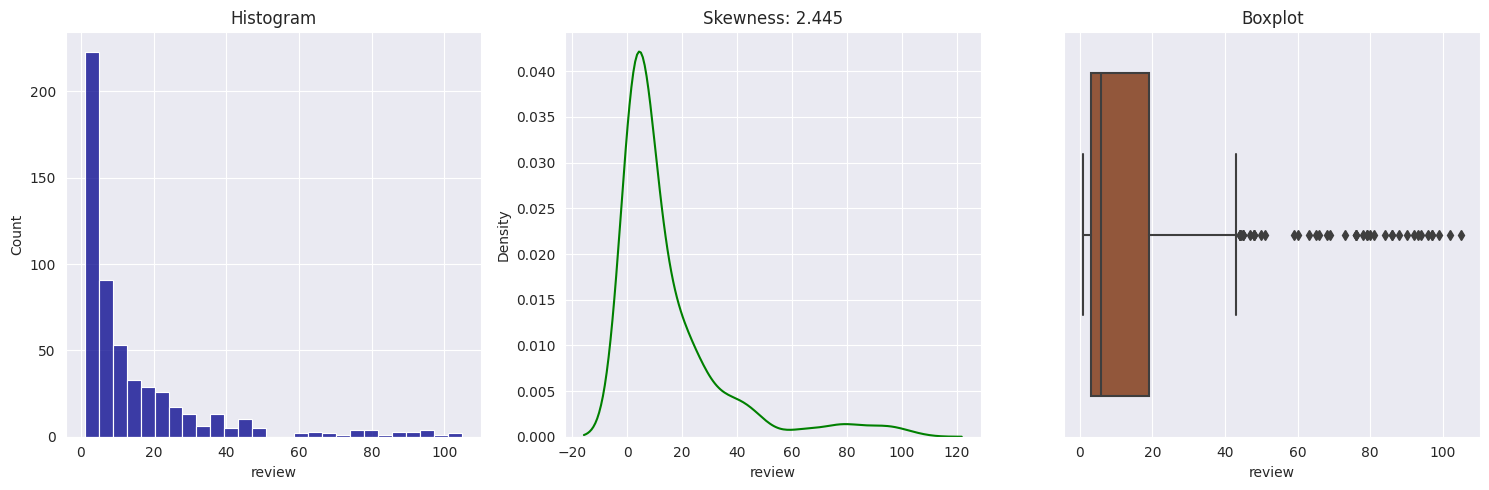

In [9]:
review_5 = plot(df, select_rating=5)

## Similarities 5 Diffrent Reviewer

<Axes: xlabel='review', ylabel='Density'>

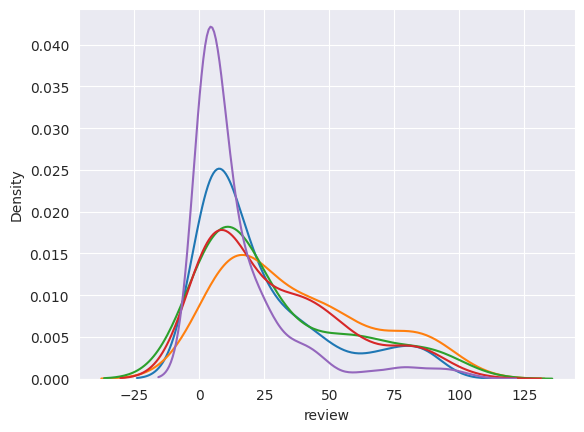

In [10]:
sns.kdeplot(review_1)
sns.kdeplot(review_2)
sns.kdeplot(review_3)
sns.kdeplot(review_4)
sns.kdeplot(review_5)